In [9]:
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator, AerJob

def execute(circuits, backend=None, shots=1024, **kwargs):
    if backend is None:
        backend = AerSimulator()
        
    # Transpile the circuits for the backend
    transpiled_circuits = transpile(circuits, backend)
    
    # Run the circuits on the backend
    job = backend.run(transpiled_circuits, shots=shots, **kwargs)
    
    return job

backend = Aer.get_backend('statevector_simulator')

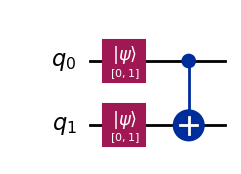

In [29]:
from math import sqrt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Define the quantum circuit
qc = QuantumCircuit(2)

# Initialize the qubits 
qc.initialize([0,1], 0)
qc.initialize([0,1], 1)

# Apply the CNOT gate
qc.cx(0,1)

# Visualize the circuit
qc.draw('mpl')

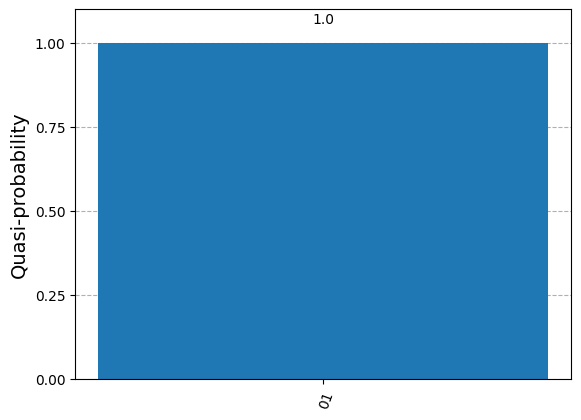

In [30]:
# Tell Qiskit how to simulate the circuit
backend = Aer.get_backend('statevector_simulator')

# execute the qc
results = execute(qc,backend).result().get_counts()

# plot the results
plot_histogram(results)

## Apply the CNOT gate with $|+\rangle$ as the control qubit

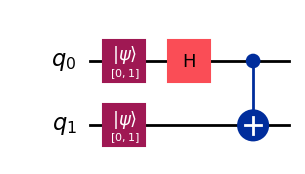

In [32]:
# Redefine the quantum circuit
qc = QuantumCircuit(2)

# Initialize the qubits 
qc.initialize([0,1], 0)
qc.initialize([0,1], 1)

# Apply the Hadamard Gate to the control qubit
qc.h(0)

# Apply the CNOT gate
qc.cx(0,1)

# Visualize the circuit
qc.draw('mpl')

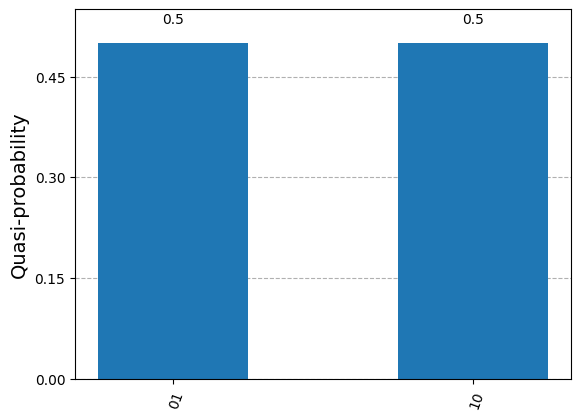

In [33]:
# Tell Qiskit how to simulate the circuit
backend = Aer.get_backend('statevector_simulator')

# execute the qc
results = execute(qc,backend).result().get_counts()

# plot the results
plot_histogram(results)

# Meausring the controlled qubit first

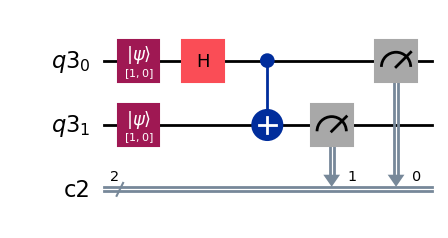

In [36]:
from qiskit import ClassicalRegister, QuantumRegister

# Prepare a register of qubits 
qr = QuantumRegister(2)

# Prepare a resiter of two classical bits
cr = ClassicalRegister(2)

# Redefine the quantum circuit 
qc = QuantumCircuit(qr, cr)

# Initialize teh 0th qubit in the state 'initial_state'
qc.initialize([1,0], 0)
qc.initialize([1,0], 1)

# Apply the Hadamard gate
qc.h(0)

# Apply the CNOT gate
qc.cx(0,1)

# Measure the qubits to the classical bits, start wit hthe controlled qubit
qc.measure(qr[1], cr[1])
qc.measure(qr[0], cr[0])

# Draw the Circuit
qc.draw('mpl')

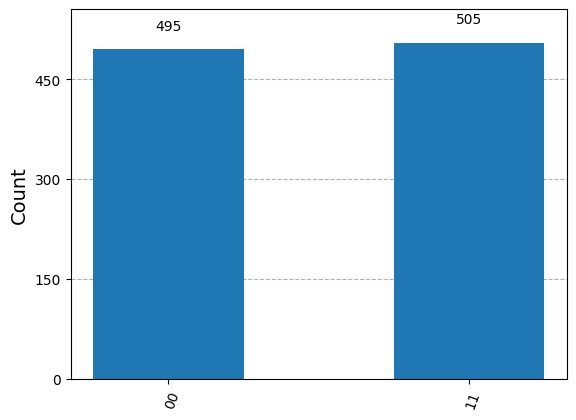

In [38]:
# Tell Qiskit how to simulate the circuit
backend = Aer.get_backend('qasm_simulator')

# Execute the qc
results = execute(qc, backend, shots = 1000).result().get_counts(qc)

# Plot the results
plot_histogram(results)